# First I start with loading a datafile which is a subset of the complete data

# I start with an elastic net regression

In [1]:
import pandas as pd
import sklearn 
import numpy as np

In [2]:
data = pd.read_csv('SamenUniek_simpel_AvD.csv')

In [3]:
data.describe()
data

,ChildID,ChildID.1,FamilyID,GenderTwin,C3.3_SRS_TotalScore_18,EstimatedIQ,SocioEconomicStatus,C3.3_Stop_Total_CorrectGO,C3.3_Stop_Total_CorrectNOGO,C3.3_Stop_Total_Mean_corGO_RT,CortexVol,SubCortGrayVol,TotalGrayVol,AgeYears,visit
0,601.0,601,6,boys,2.0,87.5,high SES,99.342105,58.333333,938.589404,496324.6342,56100,664132.6342,7.416667,1
1,701.0,701,7,boys,NaN,97.5,middle SES,99.342105,52.083333,802.609271,602906.4394,59727,791680.4394,7.416667,1
2,901.0,901,9,boys,2.0,97.5,middle SES,92.105263,50.000000,766.121429,601946.4372,64860,791047.4372,7.250000,1
3,902.0,902,9,boys,3.0,95.0,middle SES,96.710526,54.166667,699.931973,587914.1354,63776,775976.1354,7.250000,1
4,1301.0,1301,13,boys,2.0,82.5,middle SES,99.342105,52.083333,600.092715,444856.8913,52870,627151.8913,7.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,NaN,115702,1157,girls,6.0,97.5,middle SES,83.552632,47.916667,797.590551,374663.9339,59549,546966.9339,9.250000,3
585,NaN,116401,1164,girls,11.0,82.5,high SES,94.078947,54.166667,817.790210,441606.3079,54367,617691.3079,9.083333,3
586,NaN,116402,1164,girls,8.0,100.0,high SES,99.342105,56.250000,878.403973,423582.3965,55870,607171.3965,9.083333,3
587,NaN,117401,1174,girls,6.0,NaN,middle SES,94.736842,52.083333,765.687500,480249.5412,52385,641543.5412,11.416667,3


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
np.unique(data['AgeYears'])

array([ 7.        ,  7.08333333,  7.16666667,  7.25      ,  7.33333333,
        7.41666667,  7.5       ,  7.58333333,  7.66666667,  7.75      ,
        7.83333333,  7.91666667,  8.        ,  8.08333333,  8.16666667,
        8.25      ,  8.33333333,  8.41666667,  8.5       ,  8.58333333,
        8.66666667,  8.75      ,  8.83333333,  8.91666667,  9.        ,
        9.08333333,  9.16666667,  9.25      ,  9.33333333,  9.41666667,
        9.5       ,  9.58333333,  9.66666667,  9.75      ,  9.83333333,
        9.91666667, 10.        , 10.08333333, 10.16666667, 10.25      ,
       10.33333333, 10.41666667, 10.5       , 10.58333333, 10.66666667,
       10.75      , 10.83333333, 10.91666667, 11.        , 11.08333333,
       11.16666667, 11.41666667, 11.66666667])

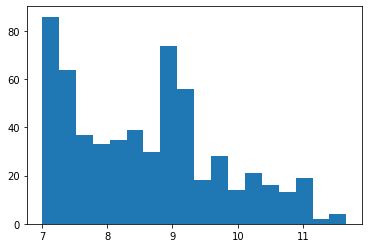

In [6]:
import matplotlib.pyplot as plt
plt.hist(data['AgeYears'],bins=18)
plt.show()

In [7]:
data

,ChildID,ChildID.1,FamilyID,GenderTwin,C3.3_SRS_TotalScore_18,EstimatedIQ,SocioEconomicStatus,C3.3_Stop_Total_CorrectGO,C3.3_Stop_Total_CorrectNOGO,C3.3_Stop_Total_Mean_corGO_RT,CortexVol,SubCortGrayVol,TotalGrayVol,AgeYears,visit
0,601.0,601,6,boys,2.0,87.5,high SES,99.342105,58.333333,938.589404,496324.6342,56100,664132.6342,7.416667,1
1,701.0,701,7,boys,NaN,97.5,middle SES,99.342105,52.083333,802.609271,602906.4394,59727,791680.4394,7.416667,1
2,901.0,901,9,boys,2.0,97.5,middle SES,92.105263,50.000000,766.121429,601946.4372,64860,791047.4372,7.250000,1
3,902.0,902,9,boys,3.0,95.0,middle SES,96.710526,54.166667,699.931973,587914.1354,63776,775976.1354,7.250000,1
4,1301.0,1301,13,boys,2.0,82.5,middle SES,99.342105,52.083333,600.092715,444856.8913,52870,627151.8913,7.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,NaN,115702,1157,girls,6.0,97.5,middle SES,83.552632,47.916667,797.590551,374663.9339,59549,546966.9339,9.250000,3
585,NaN,116401,1164,girls,11.0,82.5,high SES,94.078947,54.166667,817.790210,441606.3079,54367,617691.3079,9.083333,3
586,NaN,116402,1164,girls,8.0,100.0,high SES,99.342105,56.250000,878.403973,423582.3965,55870,607171.3965,9.083333,3
587,NaN,117401,1174,girls,6.0,NaN,middle SES,94.736842,52.083333,765.687500,480249.5412,52385,641543.5412,11.416667,3


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# To convert boys/girls to true/false
data['GenderTwin']=data['GenderTwin'] == 'boys'
X=data[['GenderTwin','CortexVol','SubCortGrayVol','TotalGrayVol']]
len(X)
y=data['AgeYears']

In [10]:
y

0       7.416667
1       7.416667
2       7.250000
3       7.250000
4       7.666667
         ...    
584     9.250000
585     9.083333
586     9.083333
587    11.416667
588    11.416667
Name: AgeYears, Length: 589, dtype: float64

In [11]:
type(y)
type(X)

pandas.core.frame.DataFrame

In [12]:
X

,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
0,True,496324.6342,56100,664132.6342
1,True,602906.4394,59727,791680.4394
2,True,601946.4372,64860,791047.4372
3,True,587914.1354,63776,775976.1354
4,True,444856.8913,52870,627151.8913
...,...,...,...,...
584,False,374663.9339,59549,546966.9339
585,False,441606.3079,54367,617691.3079
586,False,423582.3965,55870,607171.3965
587,False,480249.5412,52385,641543.5412


In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=X['GenderTwin'])

In [14]:
X_train


,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
330,False,474982.8999,58453,678229.8999
28,True,592553.5027,61470,768633.5027
386,False,559645.6791,64498,742540.6791
385,False,344616.4173,47997,498101.4173
246,False,543091.6591,55796,704478.6591
...,...,...,...,...
79,True,680128.2898,66903,901132.2898
179,False,358411.1561,49272,532263.1561
240,False,418252.9536,33500,525225.9536
270,False,618319.5370,62525,807959.5370


In [15]:
X_test

,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
181,False,545053.6339,58626,723528.6339
59,True,583587.9685,59597,761549.9685
213,False,434857.1004,47870,582450.1004
65,True,612605.8476,59934,786811.8476
151,True,627529.9931,59299,803147.9931
...,...,...,...,...
227,False,573138.3144,65709,737975.3144
175,True,559407.2032,60824,733283.2032
154,True,618131.8148,65649,815375.8148
382,False,527086.0002,56896,682727.0002


In [16]:
y_train


330     8.666667
28      8.250000
386     7.833333
385     9.000000
246     7.083333
         ...    
79      8.833333
179     7.583333
240     7.083333
270     7.000000
487    10.416667
Name: AgeYears, Length: 394, dtype: float64

In [17]:
y_test

181    7.833333
59     7.500000
213    7.416667
65     8.666667
151    8.083333
         ...   
227    7.000000
175    7.166667
154    7.750000
382    8.916667
190    7.166667
Name: AgeYears, Length: 195, dtype: float64

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [19]:
X_train

,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
330,False,474982.8999,58453,678229.8999
28,True,592553.5027,61470,768633.5027
386,False,559645.6791,64498,742540.6791
385,False,344616.4173,47997,498101.4173
246,False,543091.6591,55796,704478.6591
...,...,...,...,...
79,True,680128.2898,66903,901132.2898
179,False,358411.1561,49272,532263.1561
240,False,418252.9536,33500,525225.9536
270,False,618319.5370,62525,807959.5370


In [20]:
y_train

330     8.666667
28      8.250000
386     7.833333
385     9.000000
246     7.083333
         ...    
79      8.833333
179     7.583333
240     7.083333
270     7.000000
487    10.416667
Name: AgeYears, Length: 394, dtype: float64

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

                Coefficient
GenderTwin         0.010011
CortexVol         -0.000008
SubCortGrayVol     0.000030
TotalGrayVol       0.000004


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [25]:
#df.plot(kind='bar',figsize=(50,50))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

In [26]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mean_squared_error(y_test, y_pred)

1.3354639694451313

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

elastic=ElasticNet(normalize=True, max_iter=10000)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [28]:
search.fit(X_train, y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.0001, 'l1_ratio': 0.8}

In [29]:
np.logspace(-5,2,8)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [30]:
abs(search.best_score_)

1.296324160566711

In [31]:
elastic=ElasticNet(normalize=True,alpha=0.1,l1_ratio=0.6)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
coeff_df = pd.DataFrame(elastic.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

                Coefficient
GenderTwin             -0.0
CortexVol              -0.0
SubCortGrayVol         -0.0
TotalGrayVol           -0.0


In [33]:
#evalueer model op je training set, zie dat alleen intercept er is
y_pred = elastic.predict(X_train) 

In [34]:
data

,ChildID,ChildID.1,FamilyID,GenderTwin,C3.3_SRS_TotalScore_18,EstimatedIQ,SocioEconomicStatus,C3.3_Stop_Total_CorrectGO,C3.3_Stop_Total_CorrectNOGO,C3.3_Stop_Total_Mean_corGO_RT,CortexVol,SubCortGrayVol,TotalGrayVol,AgeYears,visit
0,601.0,601,6,True,2.0,87.5,high SES,99.342105,58.333333,938.589404,496324.6342,56100,664132.6342,7.416667,1
1,701.0,701,7,True,NaN,97.5,middle SES,99.342105,52.083333,802.609271,602906.4394,59727,791680.4394,7.416667,1
2,901.0,901,9,True,2.0,97.5,middle SES,92.105263,50.000000,766.121429,601946.4372,64860,791047.4372,7.250000,1
3,902.0,902,9,True,3.0,95.0,middle SES,96.710526,54.166667,699.931973,587914.1354,63776,775976.1354,7.250000,1
4,1301.0,1301,13,True,2.0,82.5,middle SES,99.342105,52.083333,600.092715,444856.8913,52870,627151.8913,7.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,NaN,115702,1157,False,6.0,97.5,middle SES,83.552632,47.916667,797.590551,374663.9339,59549,546966.9339,9.250000,3
585,NaN,116401,1164,False,11.0,82.5,high SES,94.078947,54.166667,817.790210,441606.3079,54367,617691.3079,9.083333,3
586,NaN,116402,1164,False,8.0,100.0,high SES,99.342105,56.250000,878.403973,423582.3965,55870,607171.3965,9.083333,3
587,NaN,117401,1174,False,6.0,NaN,middle SES,94.736842,52.083333,765.687500,480249.5412,52385,641543.5412,11.416667,3


# From here I started with a random forest regression

In [35]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['AgeYears'])

# Remove the labels from the features
# axis 1 refers to the columns
#data2= data.drop('AgeYears', axis = 1)

##Ik heb labels als labels en X als dataframe, ik rename X naar features



In [36]:
features = X
features


,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
0,True,496324.6342,56100,664132.6342
1,True,602906.4394,59727,791680.4394
2,True,601946.4372,64860,791047.4372
3,True,587914.1354,63776,775976.1354
4,True,444856.8913,52870,627151.8913
...,...,...,...,...
584,False,374663.9339,59549,546966.9339
585,False,441606.3079,54367,617691.3079
586,False,423582.3965,55870,607171.3965
587,False,480249.5412,52385,641543.5412


In [37]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets


In [38]:
features

array([[True, 496324.6342, 56100, 664132.6342],
       [True, 602906.4394, 59727, 791680.4394],
       [True, 601946.4372, 64860, 791047.4372],
       ...,
       [False, 423582.3965, 55870, 607171.3965],
       [False, 480249.5412, 52385, 641543.5412],
       [False, 489857.8944, 52420, 651249.8944]], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)

In [ ]:
# eerst runnen zonder al teveel tuning
# Train the model on training data
rf.fit(train_features, train_labels)

#Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years')

##Dus 1 jaar is ongeveer 1/8.66 * 100 -> gemiddelde fout in procenten als je het gemiddelde neemt (het naieve model)
##Dat is beter dan dit model... (oeps / auch)

rf.feature_importances_
feature_list
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(predictions)

#labels = y
#features = x
print(features[:,0].size, labels.size)
scatter(features[:,3],labels)

In [41]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)
#We will try adjusting the following set of hyperparameters:

    n_estimators = number of trees in the foreset
    max_features = max number of features considered for splitting a node
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node
    bootstrap = method for sampling data points (with or without replacement)

In [42]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [46]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune (without any tuning)
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [100]:
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [104]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [54]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 1.0620 degrees.
Accuracy = 87.26%.


In [55]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 1.0086 degrees.
Accuracy = 87.94%.


In [56]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.78%.


Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [63]:
from sklearn.model_selection import GridSearchCV # Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [64]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [66]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [70]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 1.0043 degrees.
Accuracy = 88.00%.


In [68]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.85%.


It seems we have about maxed out performance, but we can give it one more try with a grid further refined from our previous results. The code is the same as before just with a different grid so I only present the results:

In [71]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(train_features, train_labels);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   11.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 125}

In [73]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, test_features, test_labels)

Model Performance
Average Error: 0.9968 degrees.
Accuracy = 88.06%.


In [74]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.92%.




A very slight improvement in accuracy means we have reached the point of diminishing returns from tuning. We will stop here and use this as our final model.
Final Model

The final model from hyperparameter tuning is as follows.


In [77]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
print(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, test_features, test_labels)

Final Model Parameters:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 100, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Model Performance
Average Error: 1.0043 degrees.
Accuracy = 88.00%.



Comparison of All Improvement Techniques

Finally, we can make comparisons between the improvement techniques to determine which ones were most effective.


In [ ]:
#skipped part https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [ ]:
#random search best model

In [82]:
random_results = evaluate_model(best_random, train_features, train_labels, test_features, test_labels)

In [83]:
random_results['model'] = 'best_random'

In [84]:
random_results

{'time': 1.344546365737915,
 'error': 1.0077529652013404,
 'accuracy': 87.94906851485644,
 'n_trees': 800,
 'n_features': 4,
 'model': 'best_random'}

In [ ]:
# first grid search best model

In [85]:
first_grid_results = evaluate_model(best_grid, train_features, train_labels, test_features, test_labels)
first_grid_results['model'] = 'first_grid'

In [86]:
first_grid_results

{'time': 0.31839690208435056,
 'error': 1.0044193792805793,
 'accuracy': 87.97986943055234,
 'n_trees': 200,
 'n_features': 4,
 'model': 'first_grid'}

In [ ]:
#second grid search best model

In [87]:
final_model_results = evaluate_model(best_grid_final, train_features, train_labels, test_features, test_labels)
final_model_results['model'] = 'second_grid'

In [88]:
final_model_results

{'time': 0.23462305068969727,
 'error': 0.9967920997687304,
 'accuracy': 88.06188673429997,
 'n_trees': 125,
 'n_features': 4,
 'model': 'second_grid'}

In [ ]:
#waarschijnlijk nog baseline model doen? zoals we eerder hadden gedaan, zie onder
full_features = pd.read_csv('data/temps_extended.csv')
full_features = full_features.rename(columns = {'weekday': 'week'})
full_features = pd.get_dummies(full_features)

full_labels = full_features['actual']
full_features = full_features.drop('actual', axis = 1)

full_feature_list = list(full_features.columns)
important_feature_names = ['temp_1', 'average', 'ws_1', 'temp_2', 'friend', 'year']

full_features_train, full_features_test, full_labels_train, full_labels_test = train_test_split(full_features, full_labels, 
                                                                                                test_size = 0.25, random_state = 42)

baseline_preds = full_features_test['average']
baseline_errors = abs(baseline_preds - full_labels_test)
baseline_mean_error = np.mean(baseline_errors)
baseline_accuracy = 100 - (100 * np.mean(baseline_errors / full_labels_test))

In [ ]:
baseline_results = {'model': 'average', 'time': np.nan, 'n_trees': np.nan, 'error': baseline_mean_error, 'accuracy': baseline_accuracy, 'n_features': 1}

Comparison of all models (baseline doet even niet mee)

In [89]:
comparison = {'model': [random_results['model'], first_grid_results['model']],
              'accuracy': [round(random_results['accuracy'], 3), round(first_grid_results['accuracy'], 3)],
              'error': [round(random_results['error'], 3), round(first_grid_results['error'], 3)],
              'n_features': [random_results['n_features'], first_grid_results['n_features']],
              'n_trees': [random_results['n_trees'], int(first_grid_results['n_trees'])],
              'time': [round(random_results['time'], 4), round(first_grid_results['time'], 4)]}
                        
for model in [final_model_results]:
    comparison['accuracy'].append(round(model['accuracy'], 3))
    comparison['error'].append(round(model['error'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))

In [90]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [91]:
comparison[['model', 'accuracy', 'error', 'n_features', 'n_trees', 'time']]

,model,accuracy,error,n_features,n_trees,time
0,best_random,87.949,1.008,4,800,1.3445
1,first_grid,87.980,1.004,4,200,0.3184
2,second_grid,88.062,0.997,4,125,0.2346


In [93]:
#werkt nog niet op deze data
#print('Adding Data and Feature Selection error reduction: {:0.2f}%'.format(100 * (baseline_results['error'] - four_years_important_results['error']) / baseline_results['error'])) 
#print('Hyperparameter Tuning Error Reduction: {:0.2f}%'.format(100 * (four_years_important_results['error'] - first_grid_results['error']) / four_years_important_results['error']))

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

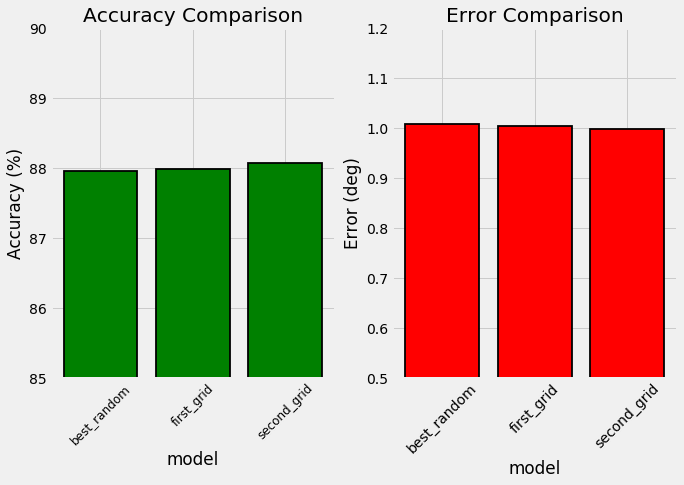

In [98]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 85, ymax = 90)
plt.xlabel('model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['error'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 0.5, ymax = 1.2)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

In [ ]:
#VISUALISEREN

In [ ]:
import sys
!conda install  graphviz


In [ ]:
import graphviz

In [ ]:
#pip install pydot
#import pydot

import sys
!conda install --yes --prefix {sys.prefix} pydot
#sys.prefix
#!conda install --yes --prefix



In [ ]:

from sklearn.tree import export_graphviz

In [ ]:

# Import tools needed for visualization

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(train_features, train_labels)
# Extract the small tree
#tree_small = rf_small.estimators_[5]
# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');

In [ ]:
#Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
#Nu met tuning proberen


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)


In [ ]:

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())





In [ ]:
# Train the model on training data
rf.fit(train_features, train_labels)

In [ ]:
#Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years')

##Dus 1 jaar is ongeveer 1/8.66 * 100 -> gemiddelde fout in procenten als je het gemiddelde neemt (het naieve model)
##Dat is beter dan dit model... (oeps / auch)